# AML NLP project - Data Exploration

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt_tab')
from nltk import tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [2]:
text_data = pd.read_csv("../data/train_v2_drcat_02.csv")

In [3]:
text_data.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [4]:
text_data.nunique()

text             44868
label                2
prompt_name         15
source              17
RDizzl3_seven        2
dtype: int64

Let's keep the original prompts

In [5]:
seven_text_data = text_data[text_data['RDizzl3_seven'] == True]

In [6]:
seven_text_data.nunique()

text             20450
label                2
prompt_name          7
source              17
RDizzl3_seven        1
dtype: int64

Here we can see that we have 7 different prompts left.

In [7]:
seven_text_data['prompt_name'].unique()

array(['Car-free cities', '"A Cowboy Who Rode the Waves"',
       'Exploring Venus', 'Facial action coding system',
       'The Face on Mars', 'Driverless cars',
       'Does the electoral college work?'], dtype=object)

In [8]:
# Remove the " in the prompt names
seven_text_data['prompt_name'] = seven_text_data['prompt_name'].str.replace('''"''','')
seven_text_data['prompt_name'].unique()

C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\2081946249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['prompt_name'] = seven_text_data['prompt_name'].str.replace('''"''','')


array(['Car-free cities', 'A Cowboy Who Rode the Waves',
       'Exploring Venus', 'Facial action coding system',
       'The Face on Mars', 'Driverless cars',
       'Does the electoral college work?'], dtype=object)

In [9]:
seven_text_data['length'] = seven_text_data['text'].str.len()
seven_text_data.head()

C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\634078843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['length'] = seven_text_data['text'].str.len()


,text,label,prompt_name,source,RDizzl3_seven,length
1168,Cars have been around for awhile and they have...,0,Car-free cities,persuade_corpus,True,3114
1169,Have you ever thought what it would be like no...,0,Car-free cities,persuade_corpus,True,1132
1170,What you are about to read is going to give yo...,0,Car-free cities,persuade_corpus,True,3319
1171,cars have many flaws nd and in this day and ag...,0,Car-free cities,persuade_corpus,True,1030
1172,There are many advantages of limiting car usag...,0,Car-free cities,persuade_corpus,True,1860


<Axes: xlabel='length', ylabel='Count'>

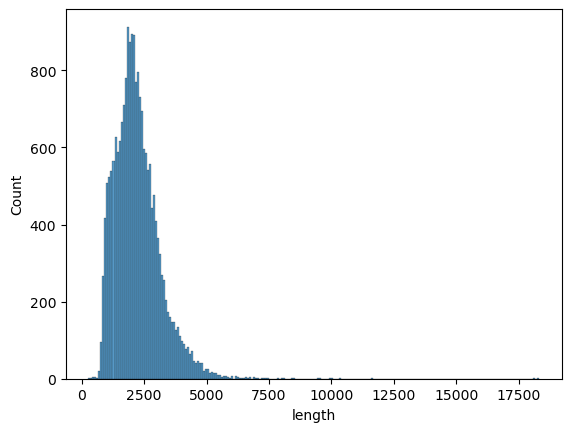

In [10]:
sns.histplot(seven_text_data, x = 'length')

In [11]:
mapping = dict(zip(seven_text_data['prompt_name'].unique(), range(7)))
seven_text_data['prompt_id'] = seven_text_data.replace(mapping)['prompt_name']


C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\1491141852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  seven_text_data['prompt_id'] = seven_text_data.replace(mapping)['prompt_name']
C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\1491141852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['prompt_id'] = seven_text_data.replace(mapping)['prompt_name']


<Axes: xlabel='prompt_id', ylabel='text'>

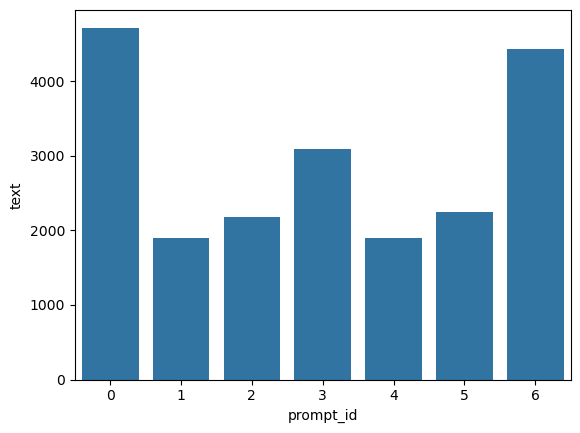

In [12]:
sns.barplot(seven_text_data.groupby('prompt_id').count(),x = 'prompt_id', y = 'text')

C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\1528820928.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  seven_text_data['source_id'] = seven_text_data.replace(mapping_source)['source']
C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\1528820928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['source_id'] = seven_text_data.replace(mapping_source)['source']


<Axes: xlabel='source_id', ylabel='text'>

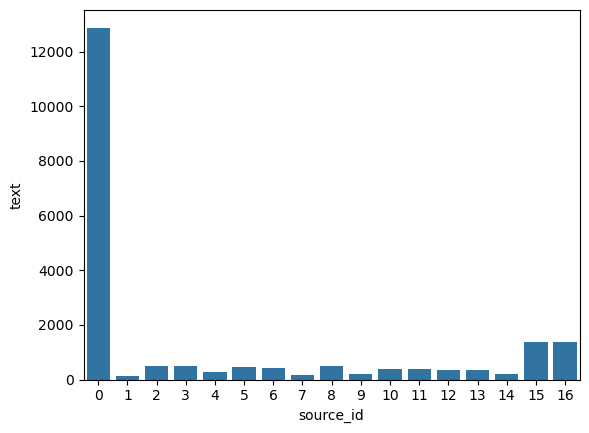

In [13]:
mapping_source = dict(zip(seven_text_data['source'].unique(), range(len(seven_text_data['source'].unique()))))
seven_text_data['source_id'] = seven_text_data.replace(mapping_source)['source']
sns.barplot(seven_text_data.groupby('source_id').count(),x = 'source_id', y = 'text')

In [14]:
mapping_source

{'persuade_corpus': 0,
 'mistral7binstruct_v2': 1,
 'darragh_claude_v6': 2,
 'llama_70b_v1': 3,
 'llama2_chat': 4,
 'darragh_claude_v7': 5,
 'falcon_180b_v1': 6,
 'chat_gpt_moth': 7,
 'radek_500': 8,
 'mistral7binstruct_v1': 9,
 'NousResearch/Llama-2-7b-chat-hf': 10,
 'mistralai/Mistral-7B-Instruct-v0.1': 11,
 'palm-text-bison1': 12,
 'cohere-command': 13,
 'radekgpt4': 14,
 'train_essays': 15,
 'kingki19_palm': 16}

The sources are highly skewed so me might need to balance this later

In [15]:
def word_count(text):
    text_list = text.split()
    return len(text_list)


In [16]:
seven_text_data['word_count'] = seven_text_data['text'].apply(word_count)
seven_text_data.head()

C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\1209599868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['word_count'] = seven_text_data['text'].apply(word_count)


,text,label,prompt_name,source,RDizzl3_seven,length,prompt_id,source_id,word_count
1168,Cars have been around for awhile and they have...,0,Car-free cities,persuade_corpus,True,3114,0,0,537
1169,Have you ever thought what it would be like no...,0,Car-free cities,persuade_corpus,True,1132,0,0,212
1170,What you are about to read is going to give yo...,0,Car-free cities,persuade_corpus,True,3319,0,0,620
1171,cars have many flaws nd and in this day and ag...,0,Car-free cities,persuade_corpus,True,1030,0,0,190
1172,There are many advantages of limiting car usag...,0,Car-free cities,persuade_corpus,True,1860,0,0,314


<Axes: xlabel='word_count', ylabel='Count'>

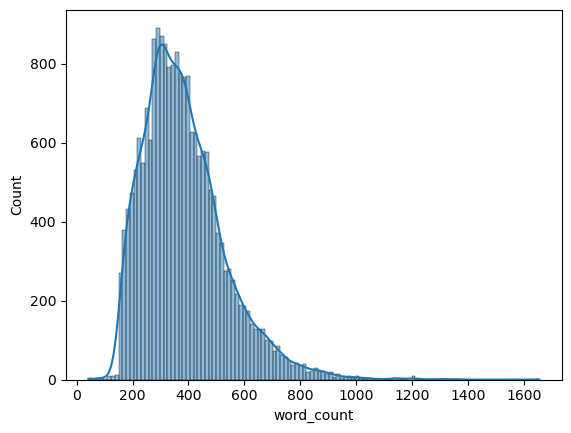

In [17]:
sns.histplot(seven_text_data, x = 'word_count',kde=True)

In [18]:
seven_text_data['mean_word_length'] = seven_text_data['text'].apply(
    lambda x: np.mean([len(word) for word in x.split()])
)

C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\2075753603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['mean_word_length'] = seven_text_data['text'].apply(


<Axes: xlabel='mean_word_length', ylabel='Count'>

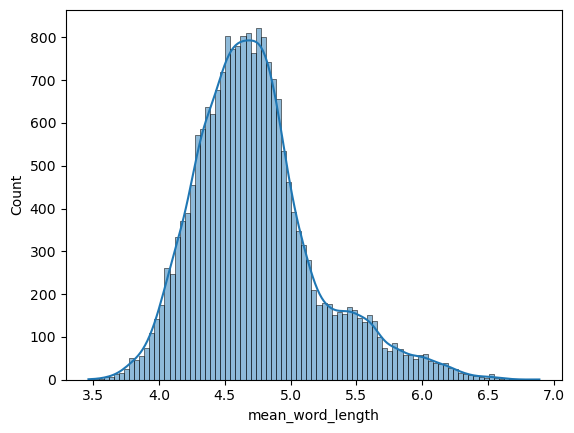

In [19]:
sns.histplot(seven_text_data, x = 'mean_word_length',kde=True)

In [25]:
seven_text_data['mean_sent_length'] = seven_text_data['text'].apply(
    lambda x: np.mean([len(sent) for sent in tokenize.sent_tokenize(x)])
)


C:\Users\SAM\AppData\Local\Temp\ipykernel_16216\4082350521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['mean_sent_length'] = seven_text_data['text'].apply(
